# Image masking example

From: https://stackoverflow.com/questions/48206605/plotting-segmented-color-images-using-numpy-masked-array-and-imshow

Text(0.5, 1.0, '(desired) \n alpha channel set manually')

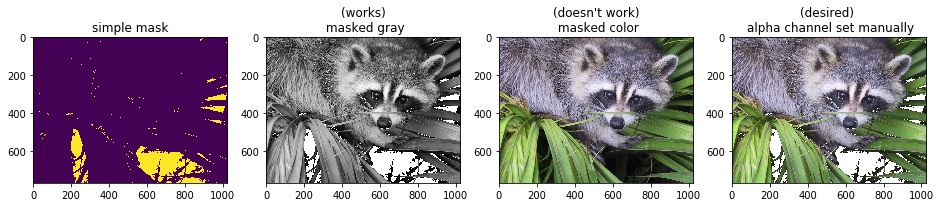

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face

img_col = face() #example image from scipy 
img_gray = np.dot(img_col[...,:3], [0.299, 0.587, 0.114]) #convert to gray
threshold = 25 
mask2D = img_gray < threshold # some exemplary mask 
mask3D = np.atleast_3d(mask2D)*np.ones_like(img_col) # expand to 3D with broadcasting...
# using numpy's masked array to specify where data is valid
m_img_gray = np.ma.masked_where( mask2D, img_gray)
m_img_col  = np.ma.masked_where( mask3D, img_col)

fig,axes=plt.subplots(1,4,num=2,clear=True,figsize=(16,6))
axes[0].imshow(mask2D.astype(np.float32)) # plot mask
axes[0].set_title("simple mask")
axes[1].imshow(m_img_gray,"gray") #plot gray verison => works 
axes[1].set_title("(works)\n masked gray")
axes[2].imshow(m_img_col)  #plot color version, => does not work
axes[2].set_title("(doesn't work)\n masked color")

# manually adding mask as alpha channel to show what I want
axes[3].imshow( np.append( m_img_col.data, 255*(1-(0 < np.sum(m_img_col.mask ,axis=2,keepdims=True) ).astype(np.uint8) ),axis=2) )
axes[3].set_title("(desired) \n alpha channel set manually")